## Data Analysis of E-Commerce Dataset

### Data Cleaning: Dask + Parquet

In [1]:
import dask.dataframe as dd

In [2]:
df = dd.read_csv("2019-Oct.csv")

In [3]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,<NA>,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,<NA>,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [4]:
df.shape[0].compute()

42448764

In [5]:
df.dtypes

event_time       string[pyarrow]
event_type       string[pyarrow]
product_id                 int64
category_id                int64
category_code    string[pyarrow]
brand            string[pyarrow]
price                    float64
user_id                    int64
user_session     string[pyarrow]
dtype: object

In [6]:
df.isnull().sum().compute()

event_time              0
event_type              0
product_id              0
category_id             0
category_code    13515609
brand             6117080
price                   0
user_id                 0
user_session            2
dtype: int64

In [7]:
df["event_time"]=dd.to_datetime(df["event_time"])

In [8]:
df["category_code"]=df["category_code"].fillna("unknown")
df["brand"]=df["brand"].fillna("unknown")

In [9]:
df=df.drop_duplicates(subset=['user_id', 'product_id', 'event_time'])
df=df.dropna(subset=["user_session"])

In [10]:
df.shape[0].compute()

42407847

In [11]:
df['event_type'].value_counts().compute()

event_type
view        40769368
cart          895712
purchase      742767
Name: count, dtype: int64[pyarrow]

In [12]:
df['brand'].nunique().compute()

np.int64(3445)

In [13]:
df['category_code'].value_counts().compute()

category_code
furniture.bathroom.toilet          16689
appliances.kitchen.grill           74619
electronics.telephone             247511
auto.accessories.compressor        59723
electronics.clocks               1310234
                                  ...   
apparel.shoes.step_ins              1332
computers.components.cooler        44174
kids.carriage                     220189
kids.toys                         110618
computers.peripherals.printer     151636
Name: count, Length: 127, dtype: int64[pyarrow]

In [14]:
df['category_id'].value_counts().compute()

category_id
2053013555095011711    82923
2053013564154708873    24465
2053013565413000141     2312
2070004998778912979     1307
2124430574616576362     1919
                       ...  
2145727399558382059     1823
2053013560388223675        3
2053013563768832881    14311
2145153815500816706     4680
2164367423673730033       15
Name: count, Length: 624, dtype: int64

In [16]:
df = df.categorize(columns=['event_type'])
df = df.categorize(columns=['brand'])
df = df.categorize(columns=['category_code'])
df = df.categorize(columns=['category_id'])

In [17]:
df["product_id"] = df["product_id"].astype("Int32")
df["user_id"] = df["user_id"].astype("Int32")

In [18]:
df["price"] = df["price"].astype("float32")

In [19]:
df.dtypes

event_time        datetime64[ns]
event_type              category
product_id                 Int32
category_id             category
category_code           category
brand                   category
price                    float32
user_id                    Int32
user_session     string[pyarrow]
dtype: object

In [20]:
df.to_parquet("cleaned_data_oct.parquet", write_index=False)

In [21]:
import pandas as pd
import os
import glob

In [22]:
folder_path = "cleaned_data_oct.parquet"

all_files = glob.glob(os.path.join(folder_path, "*.parquet"))

df_list = [pd.read_parquet(f) for f in all_files]
combined_df = pd.concat(df_list, ignore_index=True)

combined_df.to_parquet("combined_data_oct.parquet", index=False)

### Exploratory Data Analysis with Visualisations

In [23]:
data=pd.read_parquet("combined_data_oct.parquet")

In [24]:
df.shape[0].compute()

42407847

In [25]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:02:26,view,2700618,2053013563911439225,appliances.kitchen.refrigerators,indesit,349.790009,550429638,fa30065b-fc97-4757-86a6-9d82d2cc718e
1,2019-10-01 00:02:27,view,4300376,2053013552385491165,unknown,polaris,40.930000,544648245,bb8e28c8-d11f-428a-95e7-056e974fe835
2,2019-10-01 00:03:46,view,22700044,2053013556168753601,unknown,total,43.730000,513275557,4994e4b9-a3de-4ceb-8fc5-cd4d23809f8f
3,2019-10-01 00:06:50,view,12712064,2053013553559896355,unknown,triangle,30.889999,555447570,13443e50-ae90-4ef8-bdf4-6fbef86c3875
4,2019-10-01 00:08:51,view,37000014,2075210504652981138,unknown,unknown,64.349998,551563536,a81bcd36-e90f-44cd-ac76-39422f79f2ec


In [26]:
import matplotlib.pyplot as plt

#### Price Range Distribution

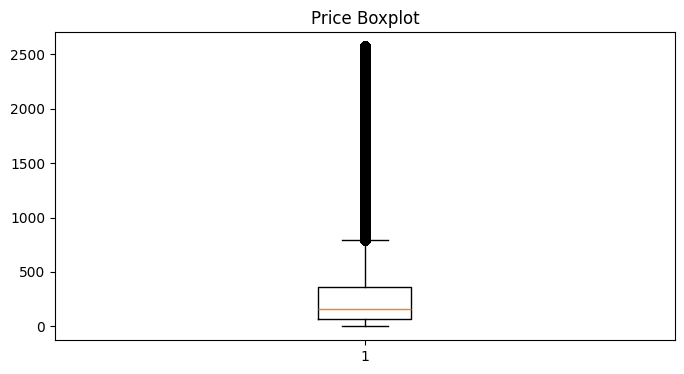

In [28]:
sample_price = data['price']
plt.figure(figsize=(8,4))
plt.boxplot(sample_price.dropna())
plt.title("Price Boxplot")
plt.show()

#### Daily Revenue

In [30]:
data['date'] = data['event_time'].dt.floor('D')
purchases = data[data['event_type']=='purchase']
daily_revenue = purchases.groupby('date')['price'].sum().sort_index()

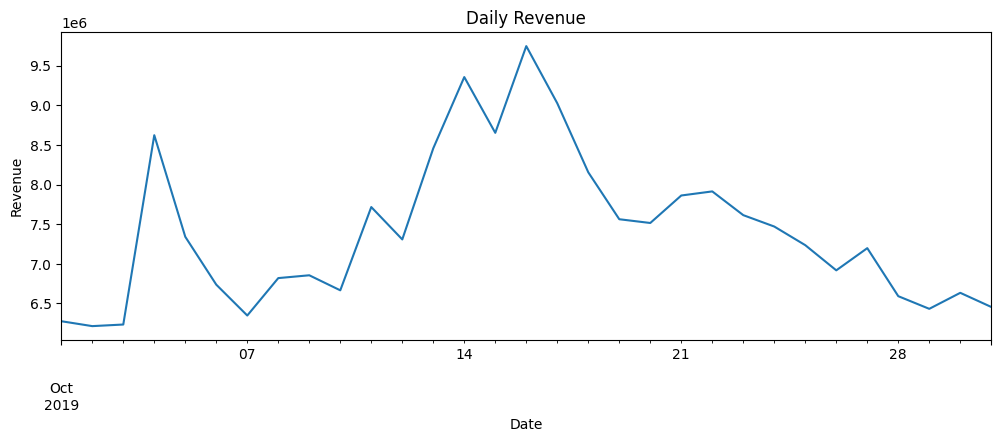

In [31]:
plt.figure(figsize=(12,4))
daily_revenue.plot()
plt.title("Daily Revenue")
plt.ylabel("Revenue")
plt.xlabel("Date")
plt.show()

#### Top Categories in terms of Revenues

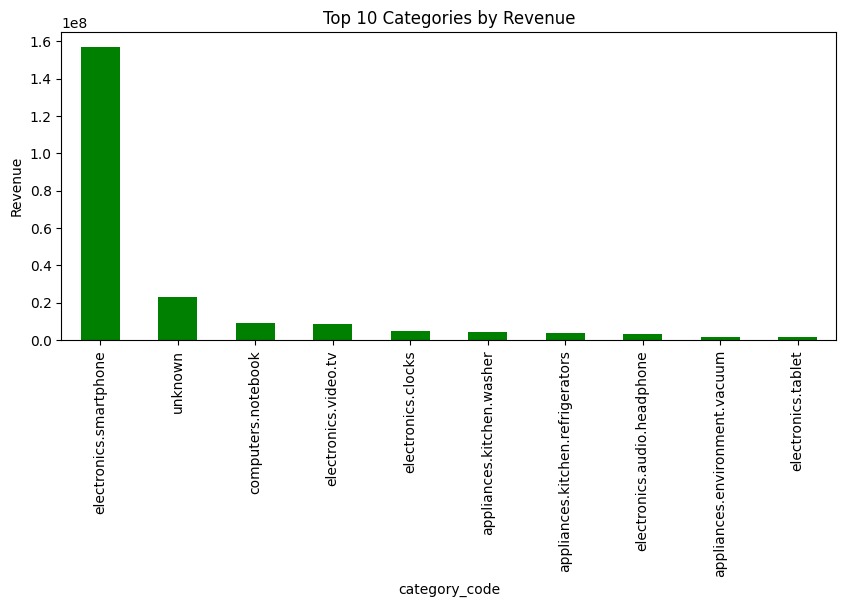

In [32]:
top_category_revenue = purchases.groupby('category_code')['price'].sum().nlargest(10)
top_category_revenue.plot(kind='bar', figsize=(10,4), color='green')
plt.title("Top 10 Categories by Revenue")
plt.ylabel("Revenue")
plt.show()

#### Top Brands in terms of Revenues

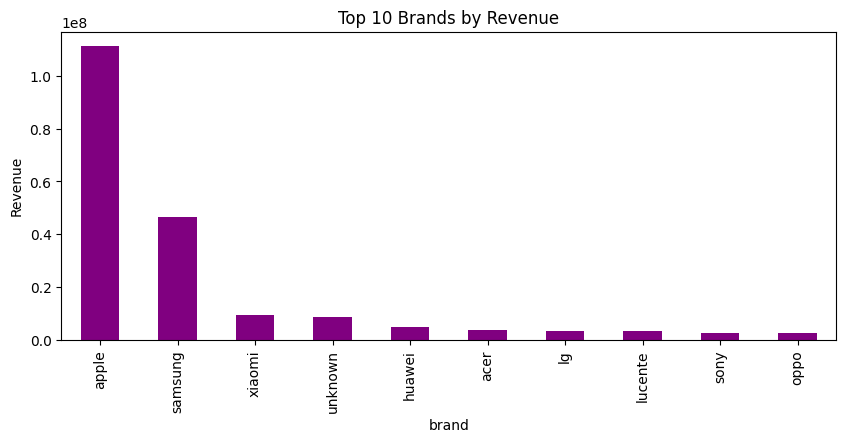

In [33]:
top_brand_revenue = purchases.groupby('brand')['price'].sum().nlargest(10)
top_brand_revenue.plot(kind='bar', figsize=(10,4), color='purple')
plt.title("Top 10 Brands by Revenue")
plt.ylabel("Revenue")
plt.show()

In [39]:
# Average events per user_id
avg_events_per_user = data.groupby('user_id').size().mean()
print("Average events per user:", avg_events_per_user)

Average events per user: 14.031693517167446


#### Repeat vs One-Time Buyers

In [40]:
# Count and Percentage of Types of Buyers: Repeat or One-timers
purchase_counts = purchases.groupby('user_id').size()
repeat_buyers = (purchase_counts > 1).sum()
total_buyers = (purchase_counts >= 1).sum()
repeat_rate = repeat_buyers / total_buyers
print(f"Repeat buyers: {repeat_buyers}, Total buyers: {total_buyers}, Repeat rate: {repeat_rate:.2%}")

Repeat buyers: 131407, Total buyers: 347118, Repeat rate: 37.86%


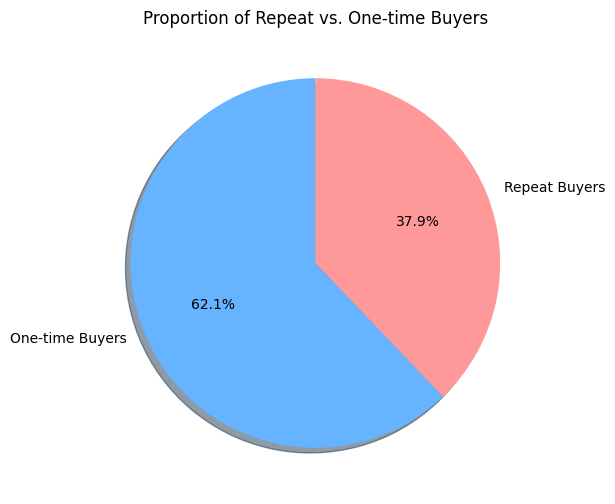

In [38]:
labels = ['One-time Buyers', 'Repeat Buyers']
sizes = [total_buyers - repeat_buyers, repeat_buyers]
colors = ['#66b3ff', '#ff9999']
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, shadow=True)
plt.title('Proportion of Repeat vs. One-time Buyers')
plt.show()